# Forward and central derivatives

This will compare forward and central derivatives with the analytical answer for the function

$$
f(x) = e^{\sin 2x}
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Use the numpy version of these functions so we can calculate them all at once
from numpy import exp,sin,cos,abs
from math import pi

Make a function to calculate
$$
f(x) = e^{\sin 2x}
$$

In [2]:
# our function
def f(x):
    return exp(sin(2*x))

Now make a function for its analytical derivative 
$$
f'(x) = 2e^{\sin 2x}\cos 2x
$$

In [3]:
def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)

Calculate the forward derivative
$$
f'(x) = \frac{f(x+h)-f(x)}{h}
$$

In [4]:
def calc_fd(f,x,h):
    fd = (f(x+h)-f(x))/h
    return fd

Calculate the central derivative
$$
f'(x) = \frac{f(x+h/2)-f(x-h/2)}{h}
$$


In [5]:
def calc_cd(f,x,h):
    cd = (f(x+h/2)-f(x-h/2))/h
    return cd

Do a check to see if our approximations are OK

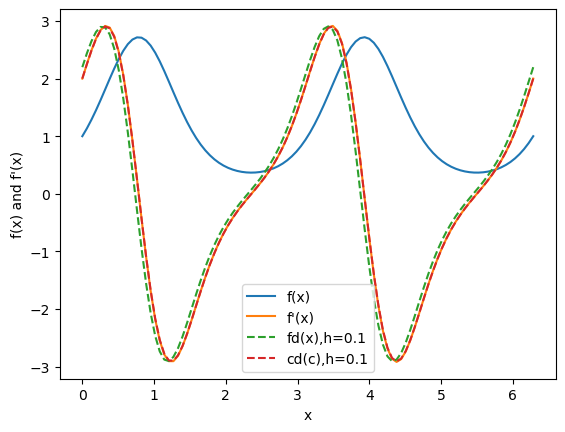

In [6]:
x = np.linspace(0,2*pi,100)
h = .1
plt.plot(x,f(x),"-",label="f(x)")
plt.plot(x,fprime(x),"-",label="f'(x)")               # Analytical version
plt.plot(x,calc_fd(f,x,h),"--",label=f"fd(x),h={h}")  # Forward Derivative
plt.plot(x,calc_cd(f,x,h),"--",label=f"cd(c),h={h}")  # Central Derivative
plt.xlabel("x")
plt.ylabel("f(x) and f'(x)")
plt.legend()
plt.show()

See how good our approximation is for one point

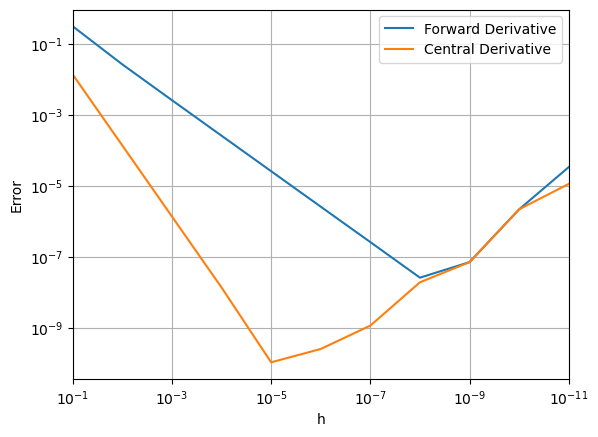

In [7]:
# See how good our approximation is
x = .5
an = fprime(x)    # The correct answer

hs = np.array([10**(-i) for i in range(1,12)])

# Forward derivative for each value of h
fds = calc_fd(f,x,hs)
# Central derivative for each value of h
cds = calc_cd(f,x,hs)

# Do a log log plot going from largest to smallest value of h
plt.xscale('log')
plt.yscale('log') 
plt.xlim(1e-1,1e-11)

plt.plot(hs,abs(fds-an),label='Forward Derivative')
plt.plot(hs,abs(cds-an),label='Central Derivative')
plt.grid()
plt.xlabel("h")
plt.ylabel("Error")
plt.legend()
plt.show()